<a href="https://colab.research.google.com/github/hwangjikwon/PyTorch/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # Library for Data Preprocessing
from torch.utils.data import Dataset, DataLoader

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pwd

/content


In [6]:
train_dataset = torchvision.datasets.FashionMNIST("../MyDrive/nlpbook/CNN", download=True,
                                                  transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 26421880/26421880 [00:02<00:00, 10091095.25it/s]


Extracting ../MyDrive/nlpbook/CNN/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../MyDrive/nlpbook/CNN/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170748.74it/s]


Extracting ../MyDrive/nlpbook/CNN/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../MyDrive/nlpbook/CNN/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3172677.92it/s]


Extracting ../MyDrive/nlpbook/CNN/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../MyDrive/nlpbook/CNN/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6422450.03it/s]

Extracting ../MyDrive/nlpbook/CNN/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../MyDrive/nlpbook/CNN/FashionMNIST/raw



In [12]:
test_dataset = torchvision.datasets.FashionMNIST("../drive/MyDrive/nlpbook/CNN", download=True, train=False,
                                                  transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 26421880/26421880 [00:02<00:00, 9409314.18it/s] 


Extracting ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 172409.07it/s]


Extracting ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3202757.05it/s]


Extracting ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5793473.84it/s]

Extracting ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../drive/MyDrive/nlpbook/CNN/FashionMNIST/raw



In [13]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

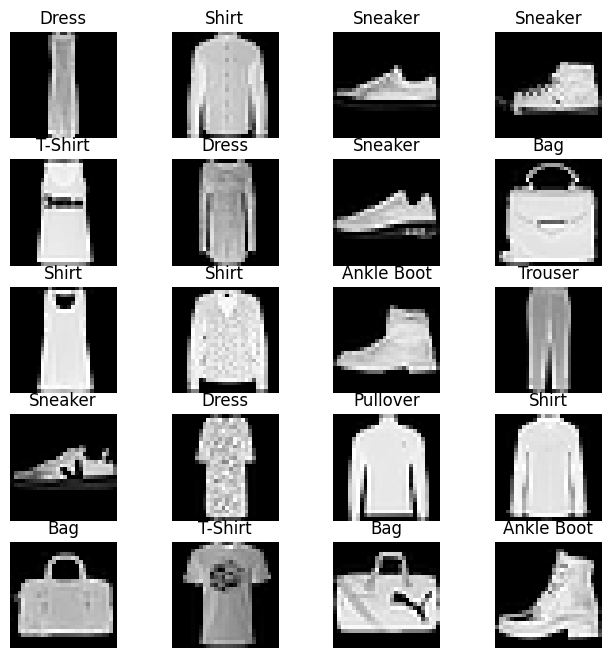

In [14]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
              8: 'Bag', 9: 'Ankle Boot'} # ten classes

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;

for i in range(1, columns*rows+1) :
  img_xy = np.random.randint(len(train_dataset)); # random number between 0 ~ 60,000(len of 'train_dataset')
  img = train_dataset[img_xy][0][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img, cmap='gray')

plt.show() # display twenty image data

In [18]:
train_dataset[img_xy][0][0:,:,]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0196, 0.0000,
          0.2824, 0.2863, 0.0000, 0.0000, 0.0118, 0.0000, 0.0039, 0.0118,
          0.0118, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.5373, 0.8941, 0.5255, 0.0000, 0.0000, 0.0000,

### 심층신경망 생성
ConvNEt이 적용되지 않은 네트워크

**nn.Module** : 클래스 형태의 모델은 항상 torch.nn.Module을 상속받음

In [21]:
class FashionDNN(nn.Module):
  def __init__(self):
    super(FashionDNN, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=256)
    self.drop = nn.Dropout(0.25)
    self.fc2 = nn.Linear(in_features=256, out_features=128)
    self.fc3 = nn.Linear(in_features=128, out_features=10)

  def forward(self, input_data):
    out = input_data.view(-1, 784)
    out = F.relu(self.fc1(out))
    out = self.drop(out)
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out


In [23]:
learning_rate = 0.001;
model = FashionDNN();
model.to(device)

criterion = nn.CrossEntropyLoss() ; # loss function for classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [25]:
num_epochs =5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train) # apply train data to model
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)

        test = Variable(images.view(100,1,28,28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)

        correct += (predictions == labels).sum()
        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if not (count % 500):
      print ("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.5819472670555115, Accuracy: 83.22999572753906%
Iteration: 1000, Loss: 0.551327645778656, Accuracy: 84.90999603271484%
Iteration: 1500, Loss: 0.3675464391708374, Accuracy: 84.58999633789062%
Iteration: 2000, Loss: 0.39740055799484253, Accuracy: 85.43000030517578%
Iteration: 2500, Loss: 0.2453778237104416, Accuracy: 85.80999755859375%
Iteration: 3000, Loss: 0.3394513726234436, Accuracy: 86.3699951171875%


In [27]:
len(test_loader)

100

## 합성곱 신경망 생성

In [28]:
class FashionCNN(nn.Module):
  def __init__(self):
    super(FashionCNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1 ),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.fc1 = nn.Linear(in_features=64*6*6, out_features = 600)
    self.drop = nn.Dropout2d(0.25)
    self.fc2 = nn.Linear(in_features = 600, out_features = 120 )
    self.fc3 = nn.Linear(in_features = 120, out_features = 10 ) # 'out_features' means the number of class in final layer

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1) # (100, ?) -> Data type convert to 1st dimension since layer changed Conv layer to fully connected layer
    out = self.fc1(out)
    out = self.drop(out)
    out = self.fc2(out)
    out = self.fc3(out)

    return out



In [29]:
learning_rate = 0.001;
model = FashionCNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [30]:
num_epochs =5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train) # apply train data to model
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)

        test = Variable(images.view(100,1,28,28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)

        correct += (predictions == labels).sum()
        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if not (count % 500):
      print ("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.5159629583358765, Accuracy: 88.47000122070312%
Iteration: 1000, Loss: 0.3486194312572479, Accuracy: 86.94999694824219%
Iteration: 1500, Loss: 0.28130125999450684, Accuracy: 89.93999481201172%
Iteration: 2000, Loss: 0.21478401124477386, Accuracy: 89.38999938964844%
Iteration: 2500, Loss: 0.15888231992721558, Accuracy: 89.27999877929688%
Iteration: 3000, Loss: 0.2030787467956543, Accuracy: 90.45999908447266%
